# **Descrição**

**Objetivo da Competição**

Nesta competição de "introdução", você usará a previsão de séries temporais para prever as vendas das lojas com base em dados da **Corporación Favorita**, uma grande varejista de alimentos sediada no Equador.

Especificamente, você criará um modelo que prevê com mais precisão as vendas unitárias de milhares de itens vendidos em diferentes lojas Favorita. Você praticará suas habilidades de aprendizado de máquina com um conjunto de dados de treinamento acessível, com datas, informações sobre lojas e itens, promoções e vendas unitárias.

## **Contexto**
Previsões não são apenas para meteorologistas. Governos preveem o crescimento econômico. Cientistas tentam prever a população futura. E empresas preveem a demanda por produtos — uma tarefa comum de cientistas de dados profissionais. As previsões são especialmente relevantes para supermercados físicos, que precisam lidar delicadamente com a quantidade de estoque a ser comprada. Preveja um pouco acima, e os supermercados ficarão presos a produtos perecíveis e com excesso de estoque. Preveja um pouco abaixo, e itens populares se esgotam rapidamente, levando à perda de receita e à insatisfação dos clientes. Previsões mais precisas, graças ao aprendizado de máquina, podem ajudar a garantir que os varejistas agradem os clientes, tendo apenas o suficiente dos produtos certos na hora certa.

Os métodos atuais de previsão subjetiva para o varejo contam com poucos dados para sustentá-los e dificilmente serão automatizados. O problema se torna ainda mais complexo à medida que os varejistas adicionam novos locais com necessidades únicas, novos produtos, gostos sazonais em constante transição e marketing de produtos imprevisível.

# **Impacto potencial**

Se for bem-sucedido, você terá desenvolvido novas habilidades em um exemplo real. Para supermercados, previsões mais precisas podem reduzir o desperdício de alimentos devido ao excesso de estoque e aumentar a satisfação do cliente. Os resultados dessa competição contínua, com o tempo, podem até garantir que sua loja local tenha exatamente o que você precisa na próxima vez que fizer compras.

# **Descrição do conjunto de dados**

Nesta competição, você deverá prever as vendas de milhares de famílias de produtos vendidas nas lojas Favorita localizadas no Equador. Os dados de treinamento incluem datas, informações sobre a loja e o produto, se o item estava em promoção e os números de vendas. Arquivos adicionais incluem informações complementares que podem ser úteis na construção dos seus modelos.

Descrições de arquivos e informações de campos de dados

**train.csv**
* Os dados de treinamento, compreendendo séries temporais de recursosstore_nbr , family e onpromotion , bem como as vendas- alvo .
* store_nbr identifica a loja onde os produtos são vendidos.
* família identifica o tipo de produto vendido.
* vendas fornece o total de vendas de uma família de produtos em uma determinada loja em uma determinada data. Valores fracionários são possíveis, pois os produtos podem ser vendidos em unidades fracionárias (1,5 kg de queijo, por exemplo, em vez de 1 pacote de batatas fritas).
* onpromotion fornece o número total de itens em uma família de produtos que estavam sendo promovidos em uma loja em uma determinada data.

**teste.csv**

* Os dados de teste, com as mesmas características dos dados de treinamento, permitirão prever as vendas- alvo para as datas neste arquivo.
* As datas nos dados de teste são para os 15 dias após a última data nos dados de treinamento.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **Exploração dos Dados**

## **Carregar os Dados**

In [113]:
holidays_events = pd.read_csv('dados/holidays_events.csv')
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [114]:
oil = pd.read_csv('dados/oil.csv')
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [115]:
stores = pd.read_csv('dados/stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [116]:
transactions = pd.read_csv('dados/transactions.csv')
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [117]:
train = pd.read_csv('dados/train.csv')
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [119]:
test = pd.read_csv('dados/test.csv')
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


## **Visualização dos Dados**

**Holidays Events**

In [121]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


Distribuição dos tipos de feriados/eventos

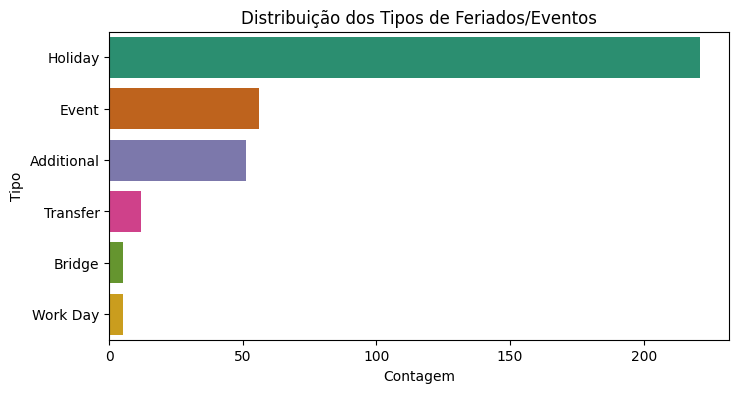

In [122]:
plt.figure(figsize=(8, 4))
sns.countplot(data=holidays_events, y='type', order=holidays_events['type'].value_counts().index, palette='Dark2')
plt.title('Distribuição dos Tipos de Feriados/Eventos')
plt.xlabel('Contagem')
plt.ylabel('Tipo')
plt.show()

Distribuição por localidade

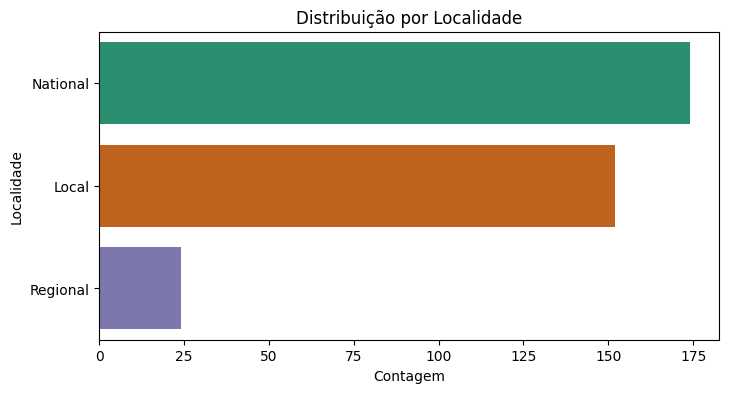

In [123]:
plt.figure(figsize=(8, 4))
sns.countplot(data=holidays_events, y='locale', order=holidays_events['locale'].value_counts().index, palette='Dark2')
plt.title('Distribuição por Localidade')
plt.xlabel('Contagem')
plt.ylabel('Localidade')
plt.show()


Feriados transferidos vs não transferidos

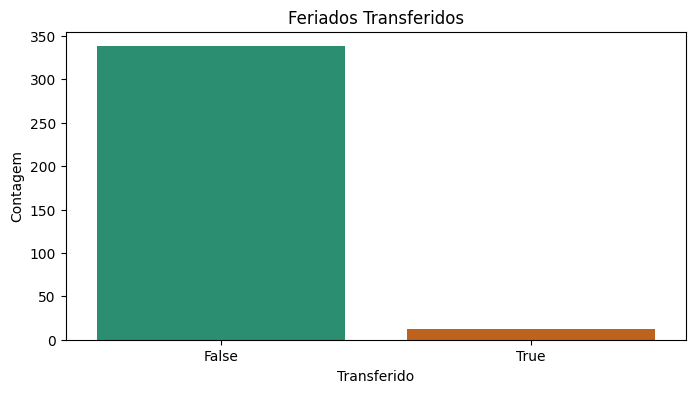

In [124]:
plt.figure(figsize=(8, 4))
sns.countplot(data=holidays_events, x='transferred', palette='Dark2')
plt.title('Feriados Transferidos')
plt.xlabel('Transferido')
plt.ylabel('Contagem')
plt.show()

 **Stores**

In [125]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


Distribuição dos tipos de loja

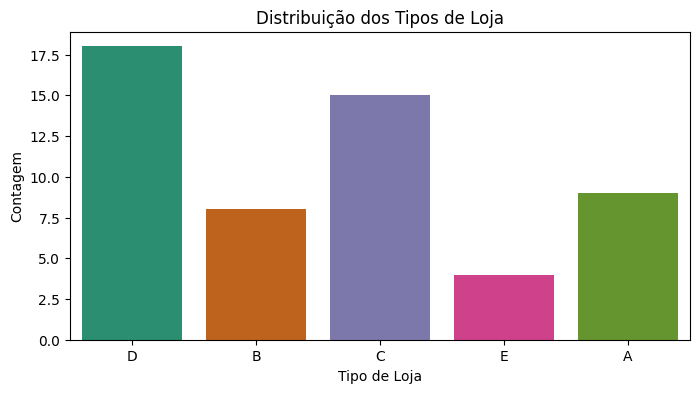

In [126]:
plt.figure(figsize=(8, 4))
sns.countplot(data=stores, x='type', palette='Dark2')
plt.title('Distribuição dos Tipos de Loja')
plt.xlabel('Tipo de Loja')
plt.ylabel('Contagem')
plt.show()

Distribuição das lojas por estado

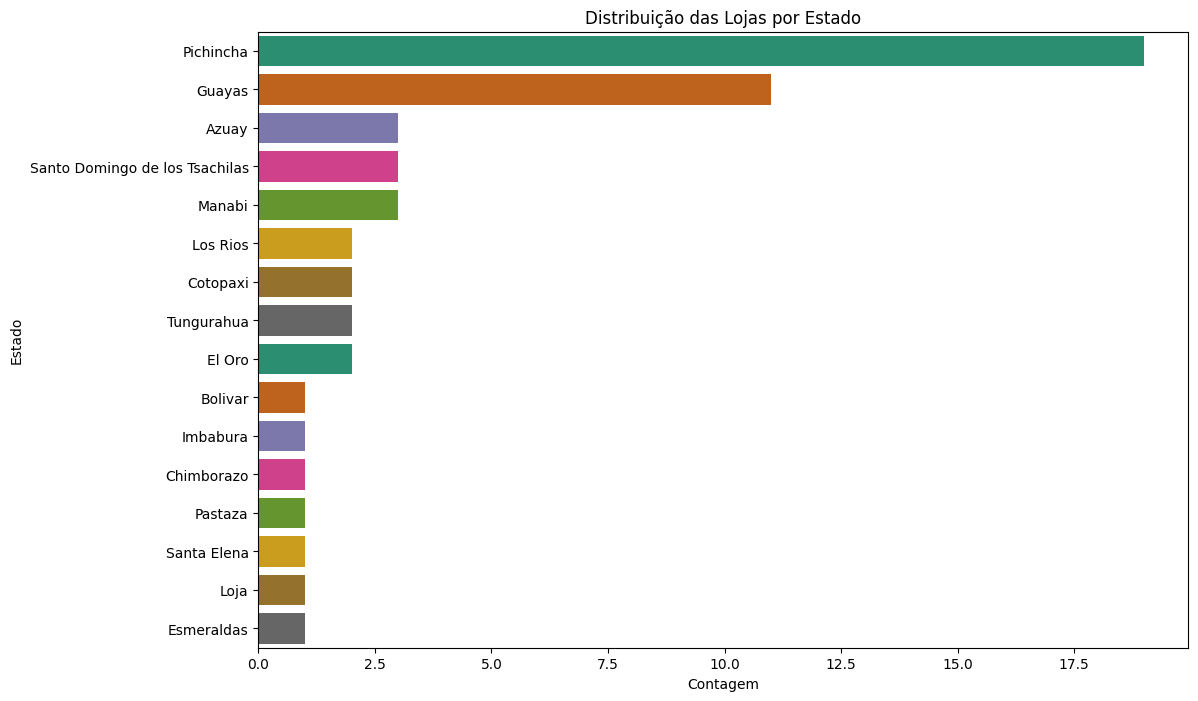

In [127]:
plt.figure(figsize=(12, 8))
sns.countplot(data=stores, y='state', order=stores['state'].value_counts().index, palette='Dark2')
plt.title('Distribuição das Lojas por Estado')
plt.xlabel('Contagem')
plt.ylabel('Estado')
plt.show()

Distribuição das lojas por cidade (top 10)

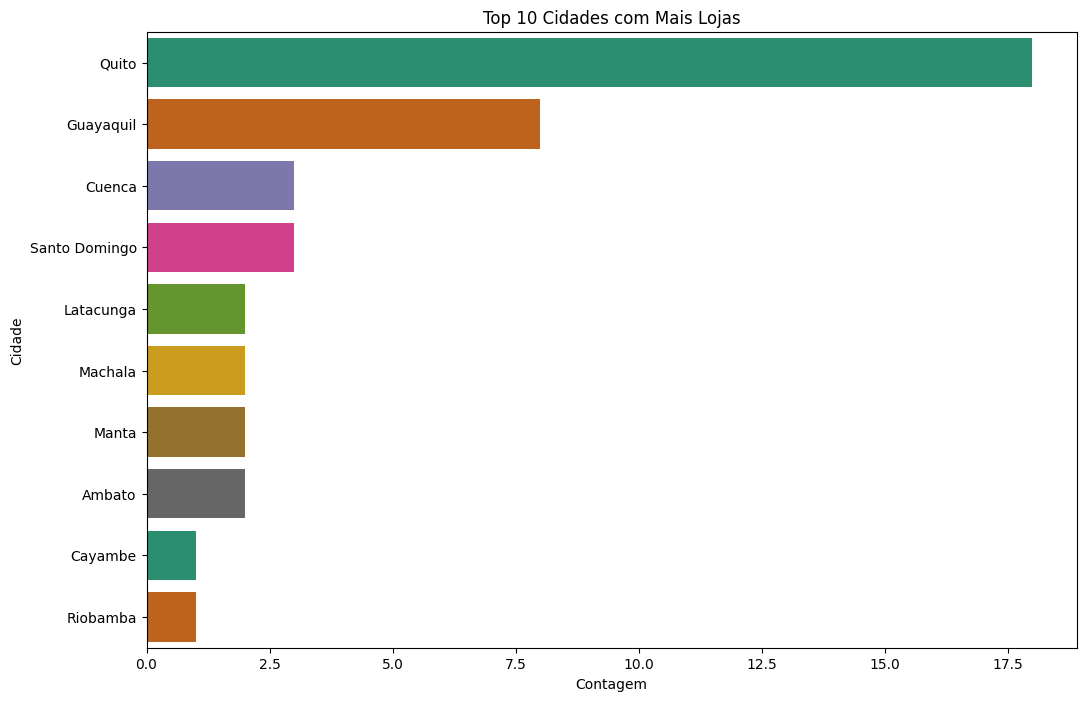

In [128]:
top_cities = stores['city'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.countplot(data=stores[stores['city'].isin(top_cities)], y='city', order=top_cities, palette='Dark2')
plt.title('Top 10 Cidades com Mais Lojas')
plt.xlabel('Contagem')
plt.ylabel('Cidade')
plt.show()

Distribuição dos clusters

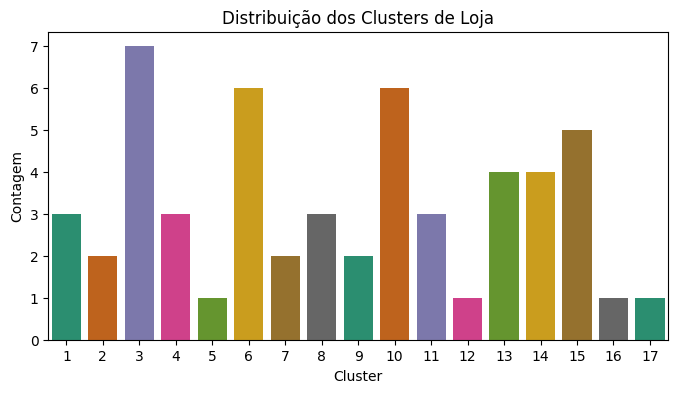

In [129]:
plt.figure(figsize=(8, 4))
sns.countplot(data=stores, x='cluster', palette='Dark2')
plt.title('Distribuição dos Clusters de Loja')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.show()

**Train**

Distribuição das Vendas (sales)

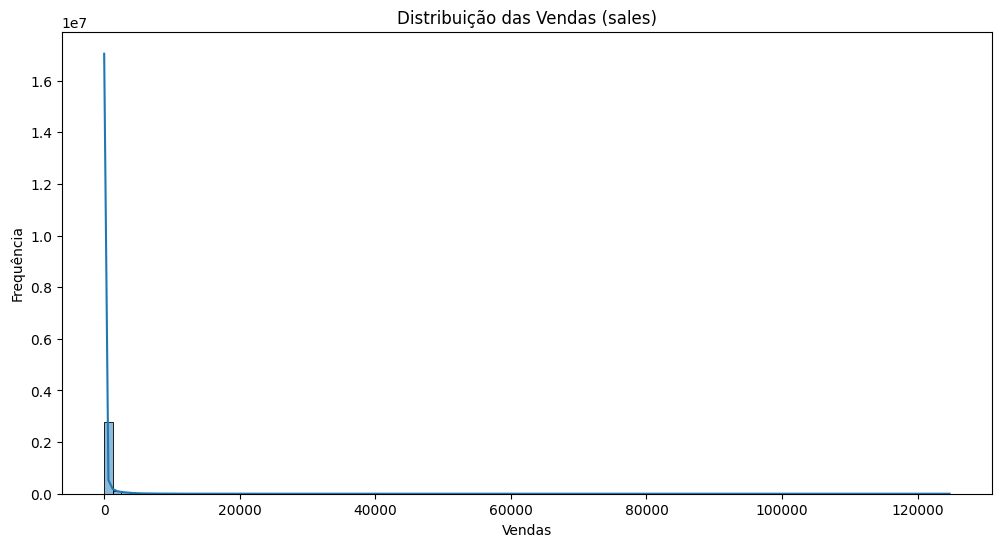

In [130]:
plt.figure(figsize=(12, 6))
sns.histplot(train['sales'], bins=100, kde=True)
plt.title('Distribuição das Vendas (sales)')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()


Vendas por Loja

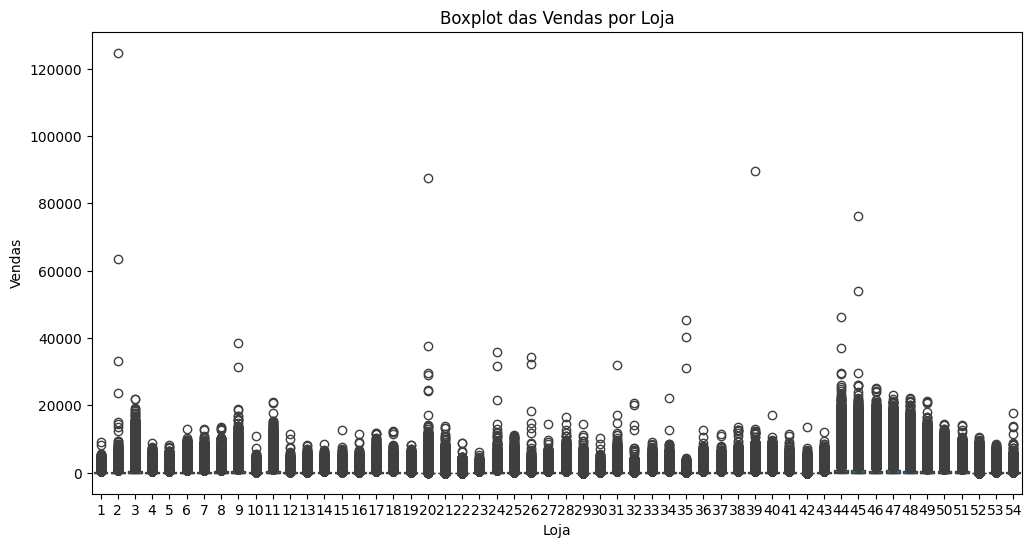

In [131]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_nbr', y='sales', data=train)
plt.title('Boxplot das Vendas por Loja')
plt.xlabel('Loja')
plt.ylabel('Vendas')
plt.show()

Vendas por Família de Produto

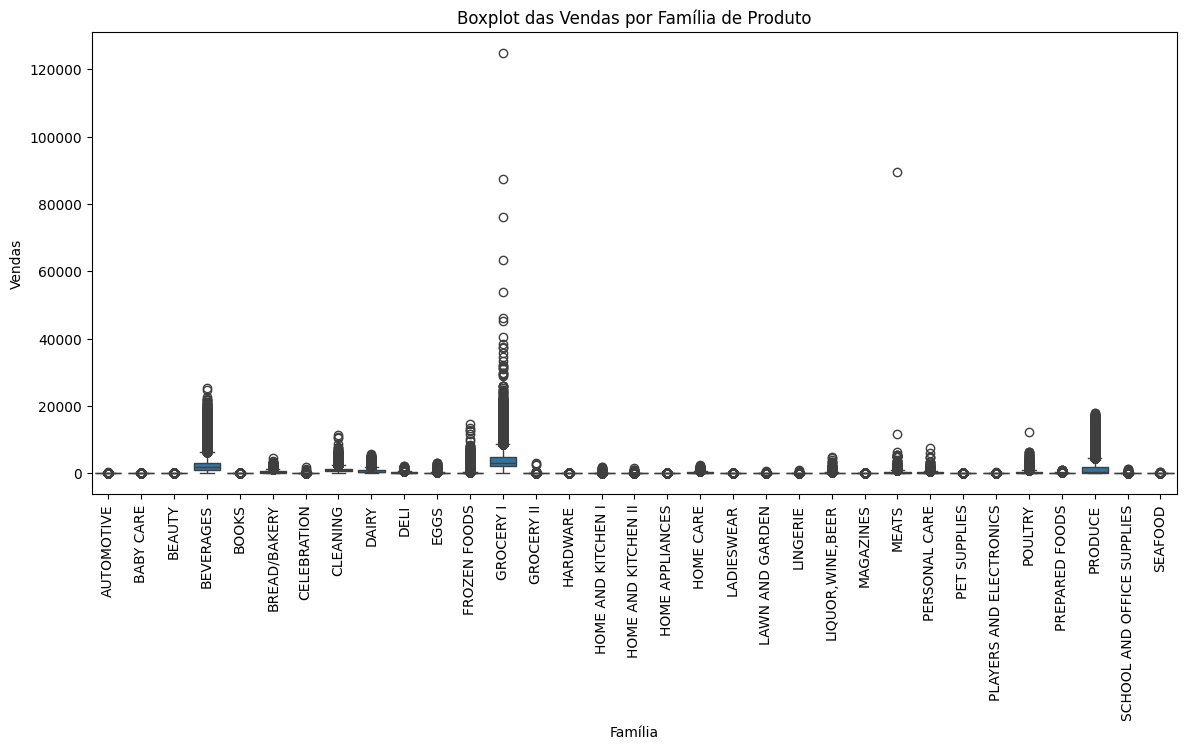

In [132]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='family', y='sales', data=train)
plt.title('Boxplot das Vendas por Família de Produto')
plt.xlabel('Família')
plt.ylabel('Vendas')
plt.xticks(rotation=90)
plt.show()

Vendas Totais ao Longo do Tempo

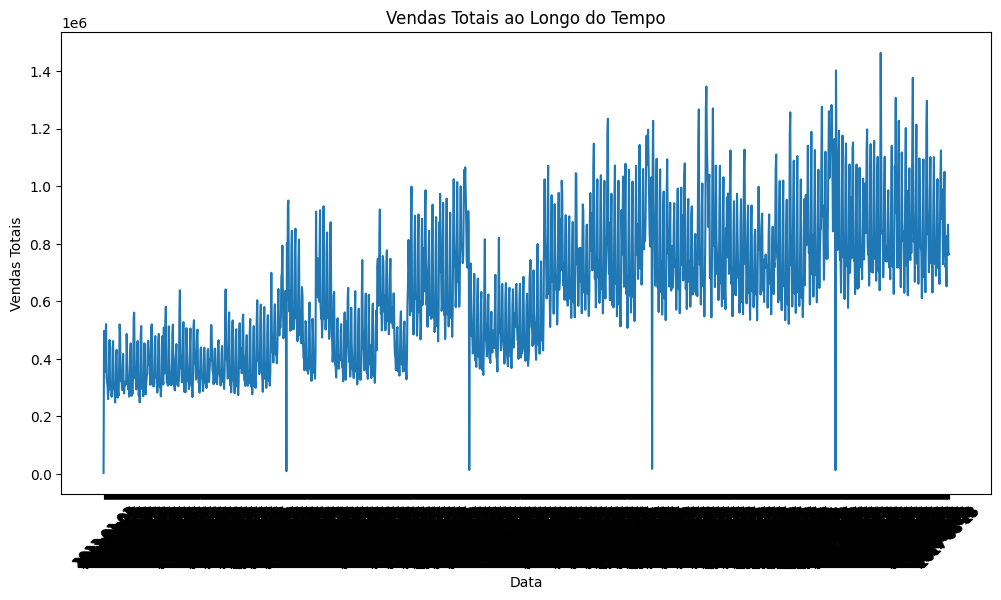

In [133]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=train.groupby('date')['sales'].sum().reset_index())
plt.title('Vendas Totais ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()

# **Pré-processamento e Limpeza dos Dados**

## **Tratamento de Valores Ausentes**

In [134]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [135]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [136]:
oil.fillna(oil['dcoilwtico'].mean(), inplace=True)

In [137]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [138]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [139]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [140]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [141]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [142]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [143]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [144]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [145]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [146]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [147]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

## **Engenharia de Features**

In [148]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


## **Features Temporais**

In [149]:
train['date'] = pd.to_datetime(train.date)
test['date'] = pd.to_datetime(test.date)

In [150]:
train['Year'] = train.date.dt.year
train['Month'] = train.date.dt.month
train['Day'] = train.date.dt.day
train['Day_of_week'] = train.date.dt.day_of_week

In [151]:
test['Year'] = test.date.dt.year
test['Month'] = test.date.dt.month
test['Day'] = test.date.dt.day
test['Day_of_week'] = test.date.dt.day_of_week

In [152]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1


In [153]:
test.head()

,id,date,store_nbr,family,onpromotion,Year,Month,Day,Day_of_week
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,2


Lags

Para que servem os lags?

Os lags são extremamente úteis em diversas análises, especialmente em séries temporais:

* Análise de autocorrelação: Permitem verificar a correlação de uma série temporal com seus próprios valores passados.
* Criação de features para modelos de aprendizado de máquina: Em modelos preditivos, os valores passados de uma variável podem ser preditores importantes para o valor presente ou futuro.
* Cálculo de variações e taxas de mudança: Ao comparar o valor atual com seus lags, é possível calcular diferenças, retornos e outras métricas de mudança ao longo do tempo.
Remoção de dependências temporais: Em alguns casos, ao incluir lags em um modelo, você pode remover a autocorrelação dos resíduos.

In [154]:
train['Lag1'] =  train.sales.shift(1)
train['Lag2'] =  train.sales.shift(2)
train['Lag3'] =  train.sales.shift(3)

In [155]:
test['Lag1'] =  train.sales.shift(-1)
test['Lag2'] =  train.sales.shift(-2)
test['Lag3'] =  train.sales.shift(-3)

In [156]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,0.0,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,0.0,0.0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,0.0,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,0.0,0.0,0.0


In [157]:
test.head()

,id,date,store_nbr,family,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2,0.0,0.0,0.0
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2,0.0,0.0,0.0
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2,0.0,0.0,0.0
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2,0.0,0.0,0.0
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,2,0.0,0.0,0.0


**Features de Loja e Trasações**

In [158]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,0.0,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,0.0,0.0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,0.0,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,0.0,0.0,0.0


In [159]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [160]:
train['type'] = train.store_nbr.map(stores.set_index('store_nbr')['type'])
train['cluster'] = train.store_nbr.map(stores.set_index('store_nbr')['cluster'])

In [161]:
test['type'] = test.store_nbr.map(stores.set_index('store_nbr')['type'])
test['cluster'] = test.store_nbr.map(stores.set_index('store_nbr')['cluster'])

In [162]:
train

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,NaN,NaN,NaN,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,0.000,NaN,NaN,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,0.000,0.000,NaN,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,0.000,0.000,0.000,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,0.000,0.000,0.000,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,6.000,6.000,522.000,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,438.133,6.000,6.000,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,154.553,438.133,6.000,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,2419.729,154.553,438.133,B,6


In [163]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [164]:
# Verificar duplicatas
print(transactions['store_nbr'].duplicated().sum())

83434


In [165]:
# Agregar transações por store_nbr (se necessário)
transactions_agg = transactions.groupby('store_nbr')['transactions'].sum().reset_index()
transactions_agg 


,store_nbr,transactions
0,1,2553963
1,2,3219901
2,3,5366350
3,4,2519007
4,5,2347877
5,6,3065896
6,7,2995993
7,8,4637971
8,9,3516162
9,10,1652493


In [166]:
# Configurar o índice
transactions_agg = transactions_agg.set_index('store_nbr')['transactions']
transactions_agg

store_nbr
1     2553963
2     3219901
3     5366350
4     2519007
5     2347877
6     3065896
7     2995993
8     4637971
9     3516162
10    1652493
11    3972488
12    1958852
13    1572504
14    2287850
15    2209898
16    1464498
17    2295485
18    2071278
19    2107489
20    1422539
21     842891
22     504156
23    1788171
24    3568206
25    1520362
26    1065059
27    2485687
28    1957594
29     981448
30    1171130
31    2306044
32    1065226
33    1743003
34    3864018
35    1123889
36    1738129
37    2481719
38    2867052
39    2389482
40    2181195
41    1764146
42     802646
43    2182356
44    7273093
45    6201115
46    5990113
47    6535810
48    5107785
49    4574103
50    4384444
51    2873614
52     275393
53    1180082
54    1451290
Name: transactions, dtype: int64

In [167]:
train['transactions'] = train['store_nbr'].map(transactions_agg).fillna(0)

In [168]:
test['transactions'] = test['store_nbr'].map(transactions_agg).fillna(0)

In [169]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3,type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,NaN,NaN,NaN,D,13,2553963
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,0.0,NaN,NaN,D,13,2553963
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,0.0,0.0,NaN,D,13,2553963
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,0.0,0.0,0.0,D,13,2553963
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,0.0,0.0,0.0,D,13,2553963


In [170]:
test.head()

,id,date,store_nbr,family,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3,type,cluster,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2,0.0,0.0,0.0,D,13,2553963
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2,0.0,0.0,0.0,D,13,2553963
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2,0.0,0.0,0.0,D,13,2553963
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2,0.0,0.0,0.0,D,13,2553963
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,2,0.0,0.0,0.0,D,13,2553963


**Features de Feriados e Eventos**

In [171]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


Vereficando se o dia é um feriado

In [172]:
train['holidays_events'] = train.date.isin(holidays_events.date)

In [173]:
test['holidays_events'] = test.date.isin(holidays_events.date)

In [174]:
train.holidays_events.value_counts()

holidays_events
False    2551824
True      449064
Name: count, dtype: int64

In [175]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3,type,cluster,transactions,holidays_events
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,NaN,NaN,NaN,D,13,2553963,True
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,0.0,NaN,NaN,D,13,2553963,True
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,0.0,0.0,NaN,D,13,2553963,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,0.0,0.0,0.0,D,13,2553963,True
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,0.0,0.0,0.0,D,13,2553963,True


In [176]:
test.head()

,id,date,store_nbr,family,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3,type,cluster,transactions,holidays_events
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False


## **Tratamento de Valores Ausentes**

In [177]:
train.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
Year               0
Month              0
Day                0
Day_of_week        0
Lag1               1
Lag2               2
Lag3               3
type               0
cluster            0
transactions       0
holidays_events    0
dtype: int64

In [178]:
test.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
Year               0
Month              0
Day                0
Day_of_week        0
Lag1               0
Lag2               0
Lag3               0
type               0
cluster            0
transactions       0
holidays_events    0
dtype: int64

In [179]:
train['Lag1'].fillna(train.Lag1.mean(), inplace=True)
train['Lag2'].fillna(train.Lag1.mean(), inplace=True)
train['Lag3'].fillna(train.Lag1.mean(), inplace=True)

## **Codificação de Variáveis Categóricas**

In [180]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3,type,cluster,transactions,holidays_events
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,357.775863,357.775863,357.775863,D,13,2553963,True
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,0.000000,357.775863,357.775863,D,13,2553963,True
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,0.000000,0.000000,357.775863,D,13,2553963,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,0.000000,0.000000,0.000000,D,13,2553963,True
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,0.000000,0.000000,0.000000,D,13,2553963,True


In [181]:
test.head()

,id,date,store_nbr,family,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3,type,cluster,transactions,holidays_events
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,2,0.0,0.0,0.0,D,13,2553963,False


In [182]:
train.select_dtypes(include='object').columns

Index(['family', 'type'], dtype='object')

In [183]:
test.select_dtypes(include='object').columns

Index(['family', 'type'], dtype='object')

In [184]:
train_dummies =  pd.get_dummies(train, columns=['family', 'type'])
test_dummies =  pd.get_dummies(test, columns=['family', 'type'])

In [185]:
train = train_dummies
test = test_dummies

In [186]:
train.head()

,id,date,store_nbr,sales,onpromotion,Year,Month,Day,Day_of_week,Lag1,...,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_A,type_B,type_C,type_D,type_E
0,0,2013-01-01,1,0.0,0,2013,1,1,1,357.775863,...,False,False,False,False,False,False,False,False,True,False
1,1,2013-01-01,1,0.0,0,2013,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False
2,2,2013-01-01,1,0.0,0,2013,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False
3,3,2013-01-01,1,0.0,0,2013,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False
4,4,2013-01-01,1,0.0,0,2013,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False


In [187]:
test.head()

,id,date,store_nbr,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,...,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_A,type_B,type_C,type_D,type_E
0,3000888,2017-08-16,1,0,2017,8,16,2,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,3000889,2017-08-16,1,0,2017,8,16,2,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,3000890,2017-08-16,1,2,2017,8,16,2,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,3000891,2017-08-16,1,20,2017,8,16,2,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,3000892,2017-08-16,1,0,2017,8,16,2,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False


Excluindo a coluna 'date'

In [188]:
train.head()

,id,date,store_nbr,sales,onpromotion,Year,Month,Day,Day_of_week,Lag1,...,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_A,type_B,type_C,type_D,type_E
0,0,2013-01-01,1,0.0,0,2013,1,1,1,357.775863,...,False,False,False,False,False,False,False,False,True,False
1,1,2013-01-01,1,0.0,0,2013,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False
2,2,2013-01-01,1,0.0,0,2013,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False
3,3,2013-01-01,1,0.0,0,2013,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False
4,4,2013-01-01,1,0.0,0,2013,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False


In [189]:
train.drop(['date'], axis=1, inplace=True)
test.drop(['date'], axis=1, inplace=True)

In [190]:
train

,id,store_nbr,sales,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,...,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_A,type_B,type_C,type_D,type_E
0,0,1,0.000,0,2013,1,1,1,357.775863,357.775863,...,False,False,False,False,False,False,False,False,True,False
1,1,1,0.000,0,2013,1,1,1,0.000000,357.775863,...,False,False,False,False,False,False,False,False,True,False
2,2,1,0.000,0,2013,1,1,1,0.000000,0.000000,...,False,False,False,False,False,False,False,False,True,False
3,3,1,0.000,0,2013,1,1,1,0.000000,0.000000,...,False,False,False,False,False,False,False,False,True,False
4,4,1,0.000,0,2013,1,1,1,0.000000,0.000000,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,9,438.133,0,2017,8,15,1,6.000000,6.000000,...,True,False,False,False,False,False,True,False,False,False
3000884,3000884,9,154.553,1,2017,8,15,1,438.133000,6.000000,...,False,True,False,False,False,False,True,False,False,False
3000885,3000885,9,2419.729,148,2017,8,15,1,154.553000,438.133000,...,False,False,True,False,False,False,True,False,False,False
3000886,3000886,9,121.000,8,2017,8,15,1,2419.729000,154.553000,...,False,False,False,True,False,False,True,False,False,False


In [191]:
test

,id,store_nbr,onpromotion,Year,Month,Day,Day_of_week,Lag1,Lag2,Lag3,...,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_A,type_B,type_C,type_D,type_E
0,3000888,1,0,2017,8,16,2,0.000,0.000,0.000,...,False,False,False,False,False,False,False,False,True,False
1,3000889,1,0,2017,8,16,2,0.000,0.000,0.000,...,False,False,False,False,False,False,False,False,True,False
2,3000890,1,2,2017,8,16,2,0.000,0.000,0.000,...,False,False,False,False,False,False,False,False,True,False
3,3000891,1,20,2017,8,16,2,0.000,0.000,0.000,...,False,False,False,False,False,False,False,False,True,False
4,3000892,1,0,2017,8,16,2,0.000,0.000,0.000,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,9,1,2017,8,31,3,54.000,0.000,0.000,...,True,False,False,False,False,False,True,False,False,False
28508,3029396,9,0,2017,8,31,3,0.000,0.000,16.543,...,False,True,False,False,False,False,True,False,False,False
28509,3029397,9,1,2017,8,31,3,0.000,16.543,1.000,...,False,False,True,False,False,False,True,False,False,False
28510,3029398,9,9,2017,8,31,3,16.543,1.000,0.000,...,False,False,False,True,False,False,True,False,False,False


## **Divisão dos Dados**

In [192]:
train.columns

Index(['id', 'store_nbr', 'sales', 'onpromotion', 'Year', 'Month', 'Day',
       'Day_of_week', 'Lag1', 'Lag2', 'Lag3', 'cluster', 'transactions',
       'holidays_events', 'family_AUTOMOTIVE', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'type_A',
       'type_B', 'type

In [193]:
X = train.drop(['sales'], axis=1)
y = train['sales']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')
print(f'Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}')

Train shape: (2400710, 51), Test shape: (600178, 51)
Train labels shape: (2400710,), Test labels shape: (600178,)


# **Modelagem**

In [196]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [197]:
y_pred = model.predict(X_test)
y_pred

array([2588.34122245,  419.51609787,  244.34884252, ...,  120.28938522,
        460.84061527,  351.86789246], shape=(600178,))

## **Avaliação do Modelo**

In [198]:
MSQR =  mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSQR}')

Mean Squared Error: 526221.7449059072


In [199]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [200]:
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 302.03352002296583
R² Score: 0.5765877620340161


# **Previsão e Submissão**

In [201]:
test.columns

Index(['id', 'store_nbr', 'onpromotion', 'Year', 'Month', 'Day', 'Day_of_week',
       'Lag1', 'Lag2', 'Lag3', 'cluster', 'transactions', 'holidays_events',
       'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'type_A',
       'type_B', 'type_C', 'typ

In [202]:
X_test_previsao = test

In [203]:
predictions = model.predict(X_test_previsao)
predictions

array([ 116.4611201 ,   58.60670625,   95.45148703, ..., 1337.37986972,
        398.64233811,  199.70367914], shape=(28512,))

## **Criar submissão**

In [205]:
test_original = pd.read_csv('dados/test.csv')
test_original

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [206]:
submission = pd.DataFrame({'id': test_original['id'], 'sales': predictions})
submission

,id,sales
0,3000888,116.461120
1,3000889,58.606706
2,3000890,95.451487
3,3000891,2618.387622
4,3000892,148.695787
...,...,...
28507,3029395,514.693366
28508,3029396,283.473045
28509,3029397,1337.379870
28510,3029398,398.642338


In [207]:
submission.to_csv('submission.csv', index=False)

:)